In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet  # Prophet이 설치되어 있어야 함
import time

c:\Users\jhpark\anaconda3\envs\arima\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


데이터 불러오기

In [2]:
# df = pd.read_csv('real_data.csv')
# # 예시 DataFrame (시간을 인덱스로 설정)
# df['_time'] = pd.to_datetime(df['_time'], utc=True)
# df['_time'] = df['_time'].dt.tz_convert('Asia/Seoul')
# df.set_index('_time', inplace=True)

# # 고유한 tagName별로 데이터를 분리하여 각 tagName에 맞게 변수 이름을 지정
# for tag in df['tagName'].unique():
#     globals()[f"df_{tag}"] = df[df['tagName'] == tag][['_value']]
# df_10 = df_10['2024-09-29 00:00:10+09:00':'2024-09-30 00:00:00+09:00']
# df_10.to_csv('real_data(10).csv')
# df_10resample = df_10.resample('60S').max()[:-1]
# df_10resample.to_csv('real_data(10_resample).csv')

In [3]:
df_10 = pd.read_csv('real_data(10).csv')
df_10resample = pd.read_csv('real_data(10_resample).csv')
print(df_10.shape, df_10resample.shape)

(17279, 2) (1440, 2)


In [4]:
df_10 = df_10.rename(columns={"_time": "ds", "_value": "y"})
df_10["ds"] = pd.to_datetime(df_10["ds"]).dt.tz_localize(None)

df_10resample = df_10resample.rename(columns={"_time": "ds", "_value": "y"})
df_10resample["ds"] = pd.to_datetime(df_10resample["ds"]).dt.tz_localize(None)

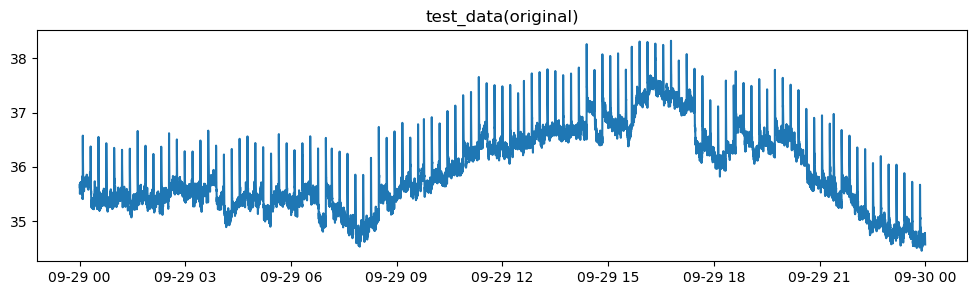

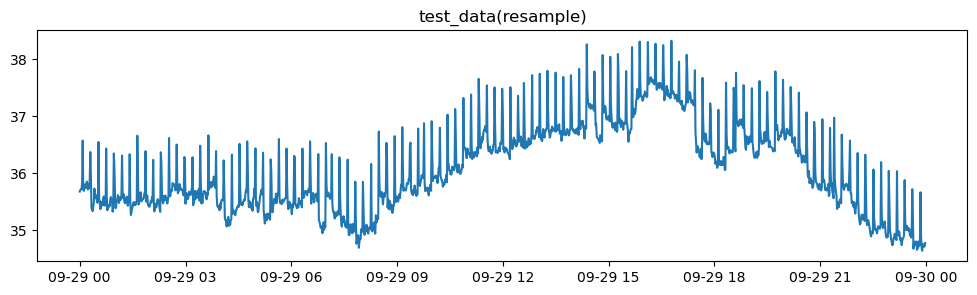

In [5]:
plt.figure(figsize=(12, 3))
plt.plot(df_10['ds'], df_10["y"])
plt.title("test_data(original)")
plt.show()

plt.figure(figsize=(12, 3))
plt.plot(df_10resample['ds'], df_10resample["y"])
plt.title("test_data(resample)")
plt.show()

In [23]:
#########바꿀 변수
predict_period=360
start_train_preiod = 720


# 학습 데이터 (처음 700개만 사용)
train = df_10.iloc[:start_train_preiod]
test = df_10.iloc[start_train_preiod:start_train_preiod+predict_period]  # 실제값 30개(trend확인용)

13:41:55 - cmdstanpy - INFO - Chain [1] start processing
13:41:56 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\jhpark\anaconda3\envs\arima\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  dates = pd.date_range(


1.0834534168243408


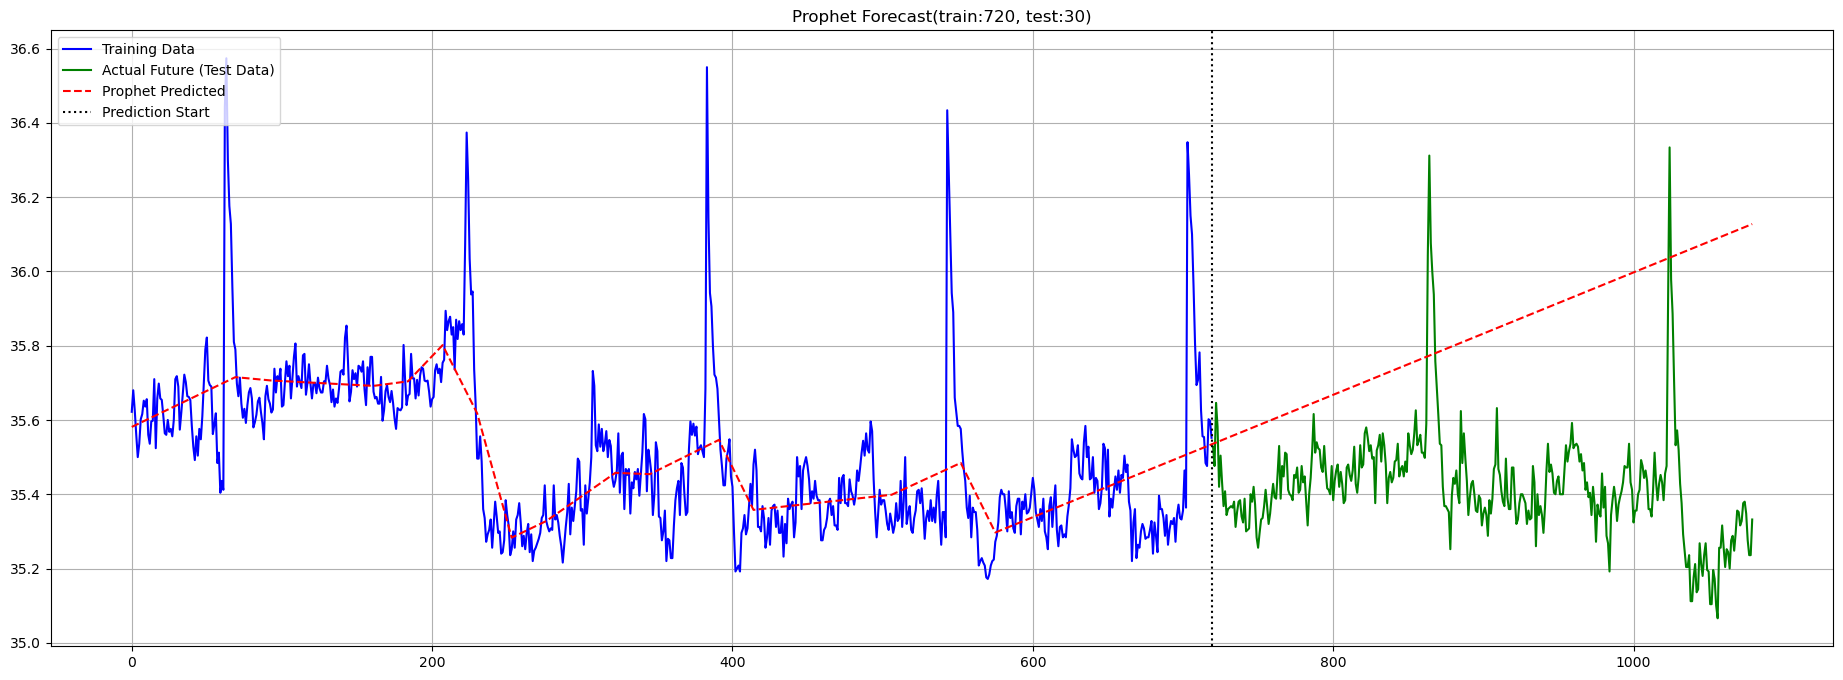

In [24]:
prophet_start = time.time()
# Prophet 모델 학습
prophet_model = Prophet()
prophet_model.add_seasonality(name='12min_cycle', period=144, fourier_order=1)
prophet_model.fit(train)

# Prophet 예측(30일 예측)
future = prophet_model.make_future_dataframe(periods=predict_period,freq='5S')
forecast_prophet = prophet_model.predict(future)  #예측된 부분만 확인하기
prophet_end = time.time()
print(prophet_end-prophet_start)
# 시각화 (Prophet)
plt.figure(figsize=(23, 8))
# 실제값
plt.plot(train.index, train["y"], label="Training Data", color="blue")
plt.plot(test.index, test["y"], label="Actual Future (Test Data)", color="green")
# Prophet 예측값
plt.plot(forecast_prophet.index+train.index[0], forecast_prophet["yhat"], label="Prophet Predicted", color="red", linestyle="dashed")

plt.axvline(train.index[-1], color="black", linestyle="dotted", label="Prediction Start")
plt.legend(loc="upper left")
plt.title("Prophet Forecast(train:720, test:30)")
plt.grid()
plt.show()

13:41:41 - cmdstanpy - INFO - Chain [1] start processing
13:41:41 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\jhpark\anaconda3\envs\arima\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  dates = pd.date_range(


1.3932645320892334


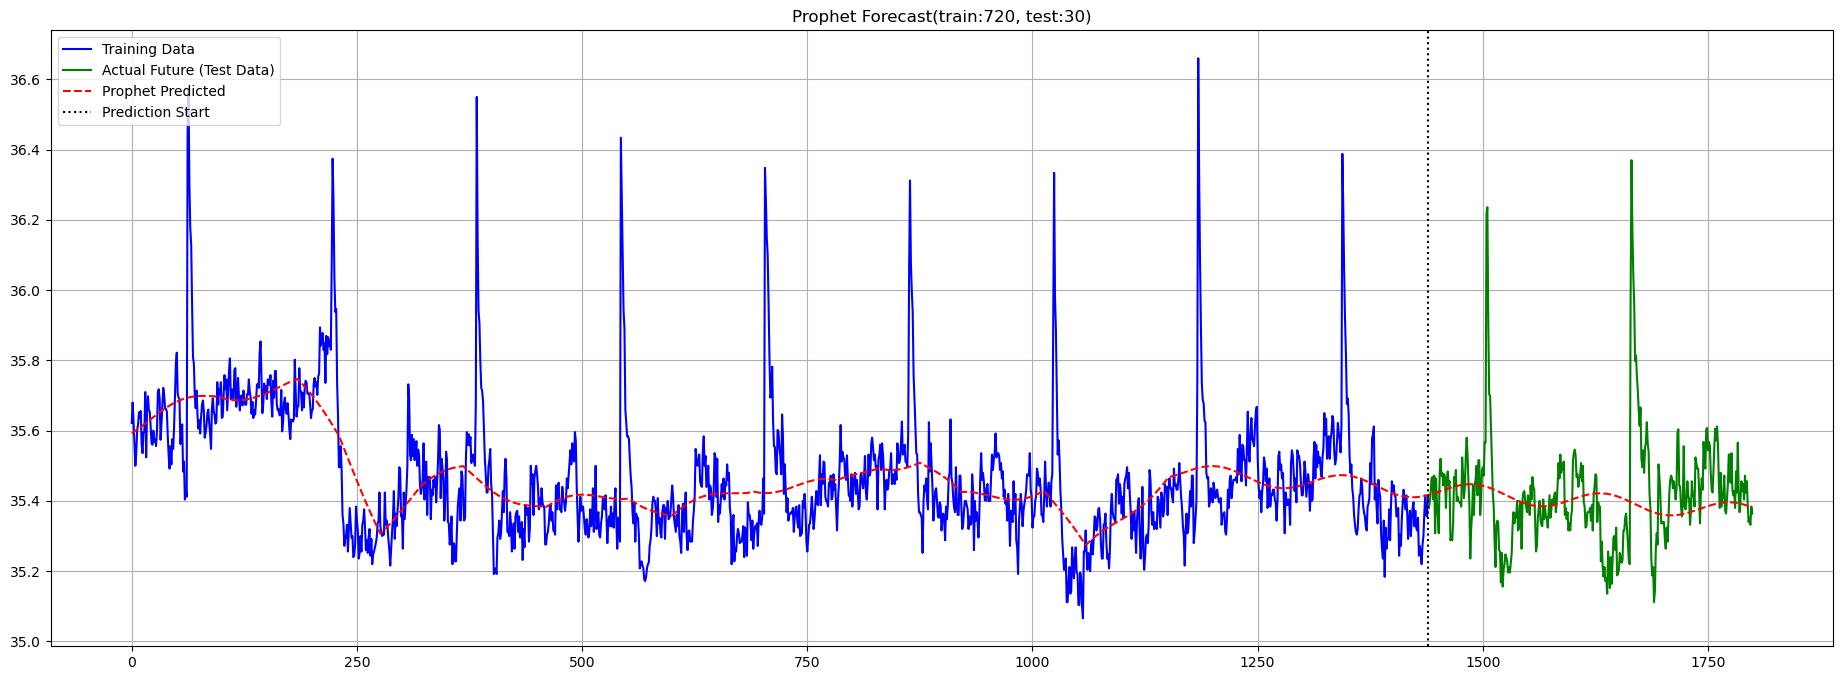

In [21]:
prophet_start = time.time()
# Prophet 모델 학습
prophet_model = Prophet()
prophet_model.add_seasonality(name='12min_cycle', period=0.0083, fourier_order=1)
prophet_model.fit(train)

# Prophet 예측(30일 예측)
future = prophet_model.make_future_dataframe(periods=predict_period,freq='5S')
forecast_prophet = prophet_model.predict(future)  #예측된 부분만 확인하기
prophet_end = time.time()
print(prophet_end-prophet_start)
# 시각화 (Prophet)
plt.figure(figsize=(23, 8))
# 실제값
plt.plot(train.index, train["y"], label="Training Data", color="blue")
plt.plot(test.index, test["y"], label="Actual Future (Test Data)", color="green")
# Prophet 예측값
plt.plot(forecast_prophet.index+train.index[0], forecast_prophet["yhat"], label="Prophet Predicted", color="red", linestyle="dashed")

plt.axvline(train.index[-1], color="black", linestyle="dotted", label="Prediction Start")
plt.legend(loc="upper left")
plt.title("Prophet Forecast(train:720, test:30)")
plt.grid()
plt.show()

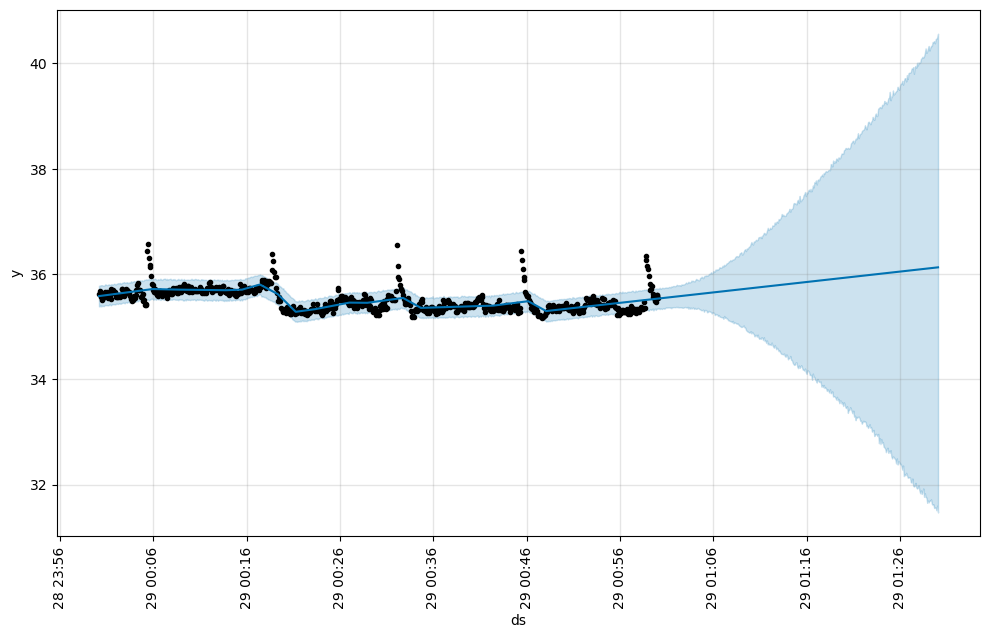

In [25]:
# pred_tr_prophet = np.ravel(forecast_prophet.loc[:Y_train.shape[0]-1, ['yhat']])
# pred_te_prophet = np.ravel(forecast_prophet.loc[Y_train.shape[0]:, ['yhat']])
fig = prophet_model.plot(forecast_prophet)
# add_changepoints_to_plot(fig.gca(), prophet, forecast_prophet)
plt.xticks(rotation=90)
plt.show()

In [89]:
#########바꿀 변수
predict_period=30
start_train_preiod = 60


# 학습 데이터 (처음 700개만 사용)
train = df_10resample.iloc[:start_train_preiod]
test = df_10resample.iloc[start_train_preiod:start_train_preiod+predict_period]  # 실제값 30개(trend확인용)

11:17:17 - cmdstanpy - INFO - Chain [1] start processing
11:17:18 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\jhpark\anaconda3\envs\arima\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  dates = pd.date_range(


0.40793943405151367


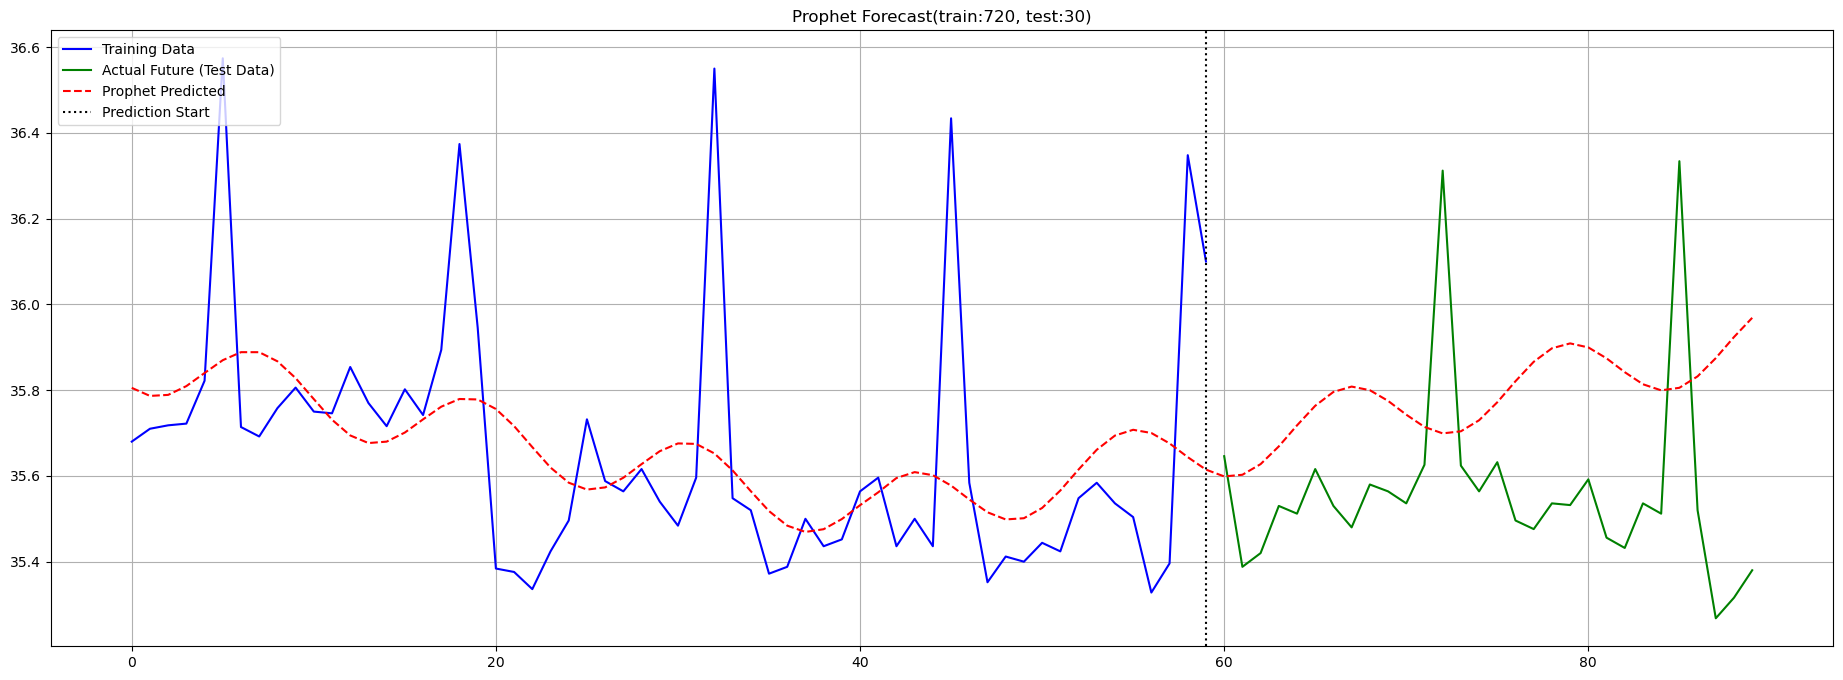

In [90]:
prophet_start = time.time()
# Prophet 모델 학습
prophet_model = Prophet()
prophet_model.add_seasonality(name='12min_cycle', period=0.0083, fourier_order=1)
prophet_model.fit(train)

# Prophet 예측(30일 예측)
future = prophet_model.make_future_dataframe(periods=predict_period,freq='T')
forecast_prophet = prophet_model.predict(future)  #예측된 부분만 확인하기
prophet_end = time.time()
print(prophet_end-prophet_start)
# 시각화 (Prophet)
plt.figure(figsize=(23, 8))
# 실제값
plt.plot(train.index, train["y"], label="Training Data", color="blue")
plt.plot(test.index, test["y"], label="Actual Future (Test Data)", color="green")
# Prophet 예측값
plt.plot(forecast_prophet.index+train.index[0], forecast_prophet["yhat"], label="Prophet Predicted", color="red", linestyle="dashed")

plt.axvline(train.index[-1], color="black", linestyle="dotted", label="Prediction Start")
plt.legend(loc="upper left")
plt.title("Prophet Forecast(train:720, test:30)")
plt.grid()
plt.show()

In [32]:
#########바꿀 변수
predict_period=30
start_train_preiod = 60


# 학습 데이터 (처음 700개만 사용)
train = df_10resample.iloc[:start_train_preiod]
test = df_10resample.iloc[start_train_preiod:start_train_preiod+predict_period]  # 실제값 30개(trend확인용)

c:\Users\jhpark\anaconda3\envs\arima\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\jhpark\anaconda3\envs\arima\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\jhpark\anaconda3\envs\arima\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


4.795424938201904


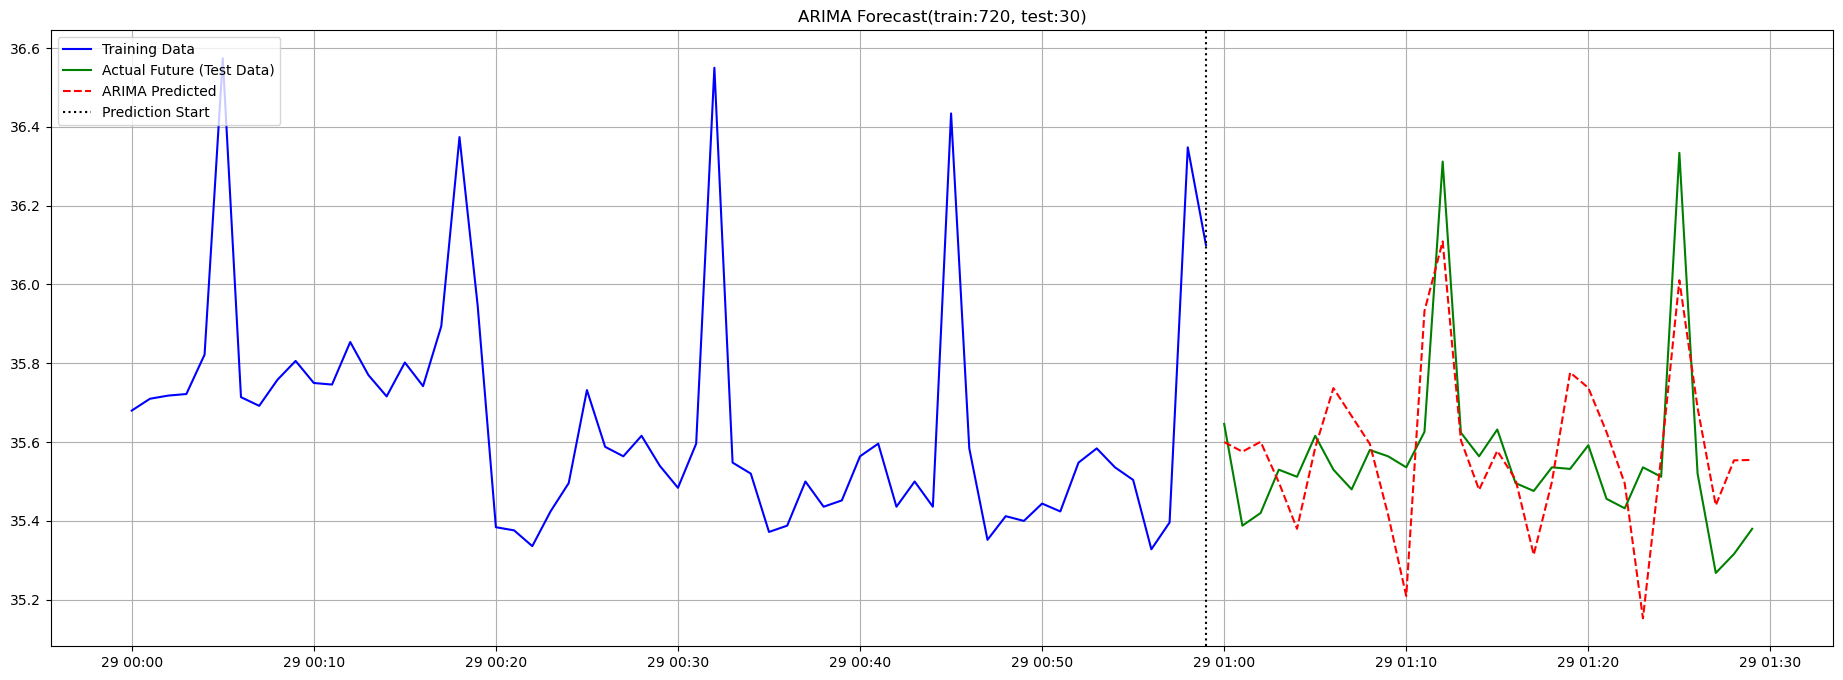

In [42]:
arima_start = time.time()
# ARIMA 모델 학습 (p=5, d=1, q=0 설정, 30일 예측)
arima_model = ARIMA(train["y"], order=(12, 2, 6))  # 기본적인 (p,d,q) 설정
arima_result = arima_model.fit()
forecast_arima = arima_result.forecast(steps=predict_period)
forecast_arima_df = pd.DataFrame({"ds": test["ds"].values, "yhat": forecast_arima.values})
arima_end = time.time()
print(arima_end-arima_start)

# 시각화 (ARIMA)
plt.figure(figsize=(23, 8))
# 실제값
plt.plot(train["ds"], train["y"], label="Training Data", color="blue")
plt.plot(test["ds"], test["y"], label="Actual Future (Test Data)", color="green")
# ARIMA 예측값
plt.plot(forecast_arima_df["ds"], forecast_arima_df["yhat"], label="ARIMA Predicted", color="red", linestyle="dashed")
plt.axvline(train["ds"].iloc[-1], color="black", linestyle="dotted", label="Prediction Start")
plt.legend(loc="upper left")
plt.title("ARIMA Forecast(train:720, test:30)")
plt.grid()
plt.show()